
### 🔄 **Task** = Missing Values Review and Completion 
# Data Imputation Check

This section analyzes missing data and fills in gaps where necessary.  
Using **KNN Imputation** or other suitable techniques, missing values are completed to enhance data quality.  
The goal is to ensure a complete dataset for further analysis.


## Overview
This script examines the dataset for missing values and performs **K-Nearest Neighbors (KNN) imputation** if necessary.

## Steps:
1. Check for missing values in numeric columns.
2. If missing data is found, apply KNN imputation with **n_neighbors=3**.
3. If no missing values are present, display a message confirming data completeness.

## Results:
✅ The dataset was analyzed, and no missing data was found. Therefore, imputation was **not** performed.



*<span style="font-size: 30px; font-style: italic;">Load essential Python libraries for data analysis</span>*

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
import matplotlib as plt
import matplotlib.pyplot as plt


print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


## <span style="font-size: 28px;">📁 Data Loading</span>

In [12]:
data = pd.read_csv("formation_damage_dataset.csv")
print(data.head())
print("---" *18)
print(data.info())


       Well_ID Formation   Fluid_Type Completion_Type  Temperature_C  \
0  WELL_000000  Dolomite    Oil-Based       Open Hole     149.672016   
1  WELL_000001     Mixed         Acid      Cased Hole      98.933119   
2  WELL_000002     Shale  Water-Based      Cased Hole     137.428599   
3  WELL_000003     Mixed         Acid       Open Hole      82.488320   
4  WELL_000004     Mixed    Oil-Based      Cased Hole     116.733681   

   Pressure_psi        pH   Salinity_ppm  Flow_Rate_bbl_day  Permeability_mD  \
0   3817.406049  5.375525  206355.978371         735.399849       152.773407   
1  10093.458461  7.436436   82356.866683         448.265019       321.709884   
2  10248.969939  8.987917   81304.148919         483.393575        21.531666   
3  13987.740540  4.231009  223079.392896        1058.581323       366.935130   
4   1673.091195  8.737042   80825.062574         886.706732        37.997009   

   Porosity_pct         Damage_Type  
0     21.834446  Corrosion Cracking  
1     30.3

### 🔄 Handling Missing Data with KNN Imputation

This function fills in missing values in numeric columns using the **K-Nearest Neighbors (KNN) imputation method**.  
If missing data is detected, it replaces them based on patterns in the dataset using the nearest three neighbors (`n_neighbors=3`).  
If no missing values are found, it prints a warning instead. This ensures a safer and more robust dataset for analysis.


In [62]:
from sklearn.impute import KNNImputer

def safe_imputer(df, numeric_cols):
    if df[numeric_cols].isnull().sum().sum() > 0:
        imputer = KNNImputer(n_neighbors=3)
        df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
        print("✅ Imputation completed")
    else:
        print("⚠️ No missing data found for imputation")
    return df


df = safe_imputer(data, ['Temperature_C', 'Pressure_psi'])

⚠️ No missing data found for imputation


### 📋 Data Quality Report

This snippet generates a summary of the dataset's completeness by reporting the total number of records and the count of missing values.  
If the dataset is clean, it verifies that no missing values remain, ensuring reliability for further analysis.


In [37]:
# Document data completeness
missing_report = f"""
Data Quality Report:
- Total records: {len(data)}
- Missing values: {data.isnull().sum().sum()}
- Clean dataset verified
"""
print(missing_report)


Data Quality Report:
- Total records: 1000000
- Missing values: 0
- Clean dataset verified



### 🔍 Validating Data Ranges

This snippet identifies temperature values that fall outside the expected range (50 to 200°C).  
By flagging **impossible or unrealistic values**, it ensures data integrity before further analysis.  
The total count of invalid temperature records is printed, helping detect potential errors or anomalies.


In [38]:
# Validate data ranges (e.g., impossible values)
invalid_temp = ~data['Temperature_C'].between(50, 200)
print(f"Invalid temperature records: {invalid_temp.sum()}")

Invalid temperature records: 0


تحلیل جامع کیفیت داده (Beyond Missing Values)

In [40]:
def comprehensive_quality_check(df):
    """Check the health of data from various aspects"""
    reports = []
    
    # 1. Checking for invalid values
    invalid_temp = df[~df['Temperature_C'].between(50, 200)]
    invalid_pressure = df[df['Pressure_psi'] < 0]
    reports.append(f"Invalid temperature values: {len(invalid_temp)} records")
    reports.append(f"Invalid pressure values: {len(invalid_pressure)} records")
    
    # 2. Checking for duplicate data
    duplicate_rows = df[df.duplicated()]
    reports.append(f"Duplicate records: {len(duplicate_rows)} cases")
    
    # 3. Outlier analysis
    from scipy import stats
    z_scores = stats.zscore(df.select_dtypes(include=['number']))
    outliers = (abs(z_scores) > 3).sum(axis=0)
    reports.append(f"Outlier data:\n{outliers}")
    
    # 4. Checking data distribution
    distribution = df.describe(percentiles=[.01, .25, .5, .75, .99])
    reports.append(f"Descriptive statistics:\n{distribution}")
    
    return "\n\n".join(reports)

# Running analysis
quality_report = comprehensive_quality_check(df)
print(quality_report)


Invalid temperature values: 0 records

Invalid pressure values: 0 records

Duplicate records: 0 cases

Outlier data:
Temperature_C        0
Pressure_psi         0
pH                   0
Salinity_ppm         0
Flow_Rate_bbl_day    0
Permeability_mD      0
Porosity_pct         0
dtype: int64

Descriptive statistics:
        Temperature_C    Pressure_psi              pH    Salinity_ppm  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean       125.008966     8000.712436        6.249131   130090.193342   
std         42.205665     3938.983560        1.546974    67489.235548   
min         50.000180     1000.011594        3.500003    10000.119302   
1%          51.561994     1147.029422        3.557007    12536.476968   
25%         89.497939     4685.651547        4.946890    73319.451571   
50%        125.012696     8002.941109        6.249271   130186.533213   
75%        160.557045    11315.457398        7.548582   186868.122403   
99%        198.421356    14

### 🔎 Well Clustering Using K-Means

This function clusters wells based on their technical characteristics, including temperature, pressure, and porosity.  
It first scales the data to ensure proper clustering, then determines the optimal number of clusters using the **Elbow Method**.  
Finally, it applies K-Means clustering and visualizes the results using a scatter plot, helping to identify patterns and group wells with similar properties.


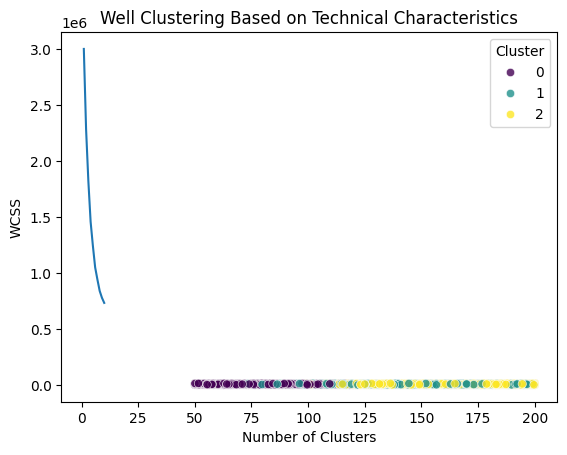

In [50]:
def formation_clustering(df):
    """Well clustering based on technical characteristics"""
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import StandardScaler
    
    # 1. Data preparation
    X = df[['Temperature_C', 'Pressure_psi', 'Porosity_pct']]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 2. Determining the optimal number of clusters
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
    
    plt.plot(range(1, 11), wcss)
    plt.title("Elbow Method for Determining the Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("WCSS")
    
    # 3. Executing clustering (Assumed: 3 clusters)
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    
    # 4. Displaying results
    sns.scatterplot(data=df, x='Temperature_C', y='Pressure_psi', 
                   hue='Cluster', palette='viridis', alpha=0.8)
    plt.title("Well Clustering Based on Technical Characteristics")
    
    return df[['Well_ID', 'Cluster']].sort_values('Cluster')

# Running analysis
cluster_results = formation_clustering(df)


### 📊 3D Scatter Plot of Well Data with Plotly

This plot visualizes the relationship between temperature, pressure, and porosity across different wells.  
Each point represents a well, and its color indicates the geological formation.  
By exploring this interactive visualization, we can identify patterns and trends in the data, helping to understand how these parameters interact.



In [ ]:
import plotly.io as pio
pio.renderers.default = "browser" 
fig.show()




### 💾 Saving the Plot as an HTML File

This command saves the interactive plot as an HTML file, allowing it to be viewed later in a web browser.  
Opening the **plot.html** file in any browser will display the visualization, making it easy to share or analyze outside of Jupyter Notebook.



In [60]:
fig.write_html("plot.html")
